In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import itertools
sys.path.append("/mnt/ssd/NMRlipids_VI-NewIonModel/scripts/")
import calcOrderParameters as cop
import fnmatch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
    supplied root directory.'''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield os.path.join(path, filename)
            

In [3]:
class Simulation():
    '''Simulation class stores simulation data relevant for NMRlipids project 6'''
    def __init__(self, dirname, 
                 ordpars_fname="OrdPars.dat", 
                 dens_fname="density_ca_cl_water.xvg", 
                 conc_bulk_fname="conc_ion_bulk_mmolL.dat", 
                 conc_nominal_fname="conc_ion_nominal_mmolL.dat"):
        self.dirname = dirname
        self.ordpars = cop.parse_op_input(os.path.join(dirname, ordpars_fname))
        try:
            self.dens    = np.loadtxt(os.path.join(dirname, dens_fname))
            self.conc_bulk = np.loadtxt(os.path.join(dirname, conc_bulk_fname))
            self.conc_nominal = np.loadtxt(os.path.join(dirname, conc_nominal_fname))
        except:
            print "Simulation in \n {d} \n has no densities or files with concentrations, setting concentrations to 0.".format(d=self.dirname)
            self.conc_bulk = np.zeros([2])
            self.conc_nominal = 0.0
                    

In [17]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/NpT"):
    if "sim22a_0mM" in f and "NaCl" in f and "OPC3" in f:
        sim_dirs.append(os.path.dirname(f))
    if "sim22a" in f and "CaCl" in f and "OPC3" in f:
        sim_dirs.append(os.path.dirname(f))

for f in sim_dirs:
    if "300K" in f:
        sim_dirs.remove(f)
        
sim_dirs.sort()
#print sim_dirs

In [13]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/NpT"):
    if "sim22a_0mM" in f and "NaCl" in f and "TIP3p-FB" in f:
        sim_dirs.append(os.path.dirname(f))
    if "sim22a" in f and "CaCl" in f and "TIP3p-FB" in f:
        sim_dirs.append(os.path.dirname(f))

for f in sim_dirs:
    if "300K" in f:
        sim_dirs.remove(f)
        
sim_dirs.sort()
#print sim_dirs

In [21]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/NpT"):
    if "sim22a_0mM" in f and "NaCl" in f and "TIP4p-FB" in f:
        sim_dirs.append(os.path.dirname(f))
    if "sim22a" in f and "CaCl" in f and "TIP4p-FB" in f:
        sim_dirs.append(os.path.dirname(f))

for f in sim_dirs:
    if "300K" in f:
        sim_dirs.remove(f)
        
sim_dirs.sort()
#print sim_dirs

In [25]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/NpT"):
    if "sim22a_0mM" in f and "NaCl" in f and "TIP3p_" in f:
        sim_dirs.append(os.path.dirname(f))
    if "sim22a" in f and "CaCl" in f and "TIP3p_" in f:
        sim_dirs.append(os.path.dirname(f))

for f in sim_dirs:
    if "300K" in f:
        sim_dirs.remove(f)
        
sim_dirs.sort()
#print sim_dirs

In [26]:
sims = []
for d in sim_dirs:
    sim = Simulation(d)
    sims.append(sim)

In [27]:
pndata = []
opname = "PN_vector"
for s in sims:
    try:
        pndata.append([s.conc_bulk[0], float(s.ordpars[opname].avg)])
        print s.conc_bulk[0], float(s.ordpars[opname].avg), float(s.ordpars[opname].errest)
    except:
        print "Simulation in dir \n {d} \n seem to have no record of the order parameter {op} -- skipping".format(d=s.dirname, op=opname)
        
print pndata

0.0 73.35844 0.05685
687.73076412 65.16298 0.06406
[[0.0, 73.35844], [687.73076412, 65.16298]]


Plotting figure 1

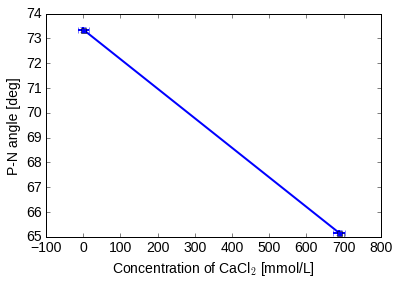

In [28]:
font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
# add some text for labels, title and axes ticks
ax.set_xlabel(r'Concentration of CaCl$_2$ [mmol/L]')
ax.set_ylabel(r'P-N angle [deg]')
#ax.set_ylim([-0.15,0.3])
#ax.set_xticks(r1)
#xlabelsl = list(xlabels)
#xlabelsl.extend(range(2, 18))
#ax.set_xticklabels(xlabelsl, rotation=0)

data = np.array(pndata)
ax.errorbar(data[:,0], data[:,1], xerr=15.0, yerr=0.1, lw=2.0, marker='s', markersize=5) #, c=colour, lw=1.0, label=point_label)
    
            


#ax.legend(loc="upper left", markerscale=0.5, scatterpoints=4)
plt.savefig("PN_angle-ECCL17_q80_sig89.eps", dpi=200)
plt.show()
